> **ALGORITMO DE MACHINE LEARNING: BOSQUE ALEATORIO**
---

Aplicación del algoritmo de Bosque Aleatorio para poder clasificar imágenes en "Con Hemorragia" o "Sin Hemorragia".

> Importación y Análisis de Data
---

In [ ]:
#IMPORTAR LIBRERÍA
import pandas as pd                                     # LIBRERÍA PARA DATAFRAMES
import numpy as np                                      # LIBRERÍA PARA MATRICES
import os                                               # LIBRERÍA PARA OPERACIONES CON EL SISTEMA OPERATIVO
import matplotlib.pyplot as plt                         # LIBRERÍA PARA GRÁFICAS 2D
from sklearn import model_selection                     # LIBRERÍA PARA SEPARAR DATA EN ENTRENAMIENTO Y VALIDACIÓN
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier     # LIBRERÍA PARA IMPLEMENTAR REGRESIÓN POR BOSQUE ALEATORIO
from sklearn.model_selection import KFold               # LIBRERÍA PARA DIVIDIR LA DATA EN N-FOLD O SUBCONJUNTOS DE TESTING DIFERENTES
from sklearn.model_selection import cross_val_score     # LIBRERÍA PARA OBTENER LA CORRELACIÓN POR VALIDACIÓN CRUZADA
from sklearn.metrics import balanced_accuracy_score     # LIBRERÍA PARA HALLAR LA EXACTITUD BALANCEADA
from sklearn.metrics import roc_curve                   # LIBRERÍA PARA HALLAR CURVAS ROC
from sklearn.externals import joblib                    # LIBRERÍA PARA EXPORTAR MODELO DE MACHINE LEARNING

from google.colab import drive          # LIBRERÍA PARA IMPORTAR DESDE GOOGLE DRIVE

In [ ]:
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#LEER ARCHIVO EXCEL (.xlsx)
mainpath = "drive/My Drive/DATASET"
filenameDatos = "TUMOR_CEREBRO/parametrosTumor.csv"
fullpathDatos = os.path.join(mainpath,filenameDatos)

data = pd.read_csv(fullpathDatos, index_col=0)

#Mostrar Datos
data

,Porcentaje de Mancha,Promedio de Intensidad,Desviación Estándar de Intensidad,Máxima Intensidad,Mínima Intensidad,Entropía de Textura,Varianza de Textura,Correlación de Textura,Energía de Textura,Homogeneidad de Textura,Estado del Cerebro
0,49.252479,93.838546,89.451762,255.0,0.0,2621.709961,43.389640,0.997289,0.213320,0.516522,1.0
1,49.086710,115.410179,79.533033,255.0,0.0,1950.155884,125.480670,0.990075,0.071438,0.355574,1.0
2,35.441254,69.860215,85.199867,255.0,0.0,1183.942871,69.204524,0.995236,0.379650,0.545652,1.0
3,47.140555,84.117130,91.141128,255.0,0.0,1307.092896,72.159579,0.995658,0.295965,0.486173,1.0
4,38.124081,104.825140,80.175371,255.0,0.0,1563.685791,42.565012,0.996686,0.130223,0.467302,1.0
...,...,...,...,...,...,...,...,...,...,...,...
195,1.249752,92.769138,82.628428,255.0,0.0,167.025467,505.054390,0.962969,0.303877,0.392242,0.0
196,0.000000,80.651865,75.794339,255.0,0.0,104.847260,819.673553,0.928621,0.148172,0.247233,0.0
197,15.795116,85.946655,87.462606,255.0,0.0,151.472992,1483.998026,0.903087,0.104616,0.284799,0.0
198,0.000000,57.380370,77.459869,255.0,0.0,38.171665,846.095230,0.929699,0.452106,0.525270,0.0


In [ ]:
correlacion_pearson = data.corr()
correlacion_pearson

,Porcentaje de Mancha,Promedio de Intensidad,Desviación Estándar de Intensidad,Máxima Intensidad,Mínima Intensidad,Entropía de Textura,Varianza de Textura,Correlación de Textura,Energía de Textura,Homogeneidad de Textura,Estado del Cerebro
Porcentaje de Mancha,1.000000,0.456111,0.391711,-0.005481,0.044325,0.689976,-0.472706,0.561566,-0.303700,0.189483,0.324878
Promedio de Intensidad,0.456111,1.000000,-0.182445,0.170466,0.468680,0.518577,-0.361944,0.357332,-0.594920,-0.319589,0.484977
Desviación Estándar de Intensidad,0.391711,-0.182445,1.000000,0.244845,-0.576413,0.073087,0.167365,-0.022184,0.405389,0.249751,-0.072190
Máxima Intensidad,-0.005481,0.170466,0.244845,1.000000,-0.086237,0.082014,0.167424,-0.159798,0.072151,-0.186432,0.060385
Mínima Intensidad,0.044325,0.468680,-0.576413,-0.086237,1.000000,0.165727,-0.181433,0.108777,-0.333656,-0.032837,0.290085
Entropía de Textura,0.689976,0.518577,0.073087,0.082014,0.165727,1.000000,-0.421964,0.467452,-0.310020,0.100363,0.579620
Varianza de Textura,-0.472706,-0.361944,0.167365,0.167424,-0.181433,-0.421964,1.000000,-0.976119,0.417251,-0.207309,-0.274096
Correlación de Textura,0.561566,0.357332,-0.022184,-0.159798,0.108777,0.467452,-0.976119,1.000000,-0.394935,0.266048,0.292330
Energía de Textura,-0.303700,-0.594920,0.405389,0.072151,-0.333656,-0.310020,0.417251,-0.394935,1.000000,0.545082,-0.181390
Homogeneidad de Textura,0.189483,-0.319589,0.249751,-0.186432,-0.032837,0.100363,-0.207309,0.266048,0.545082,1.000000,0.029460


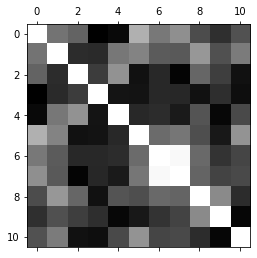

In [ ]:
plt.matshow(abs(data.corr()), cmap = 'gray')

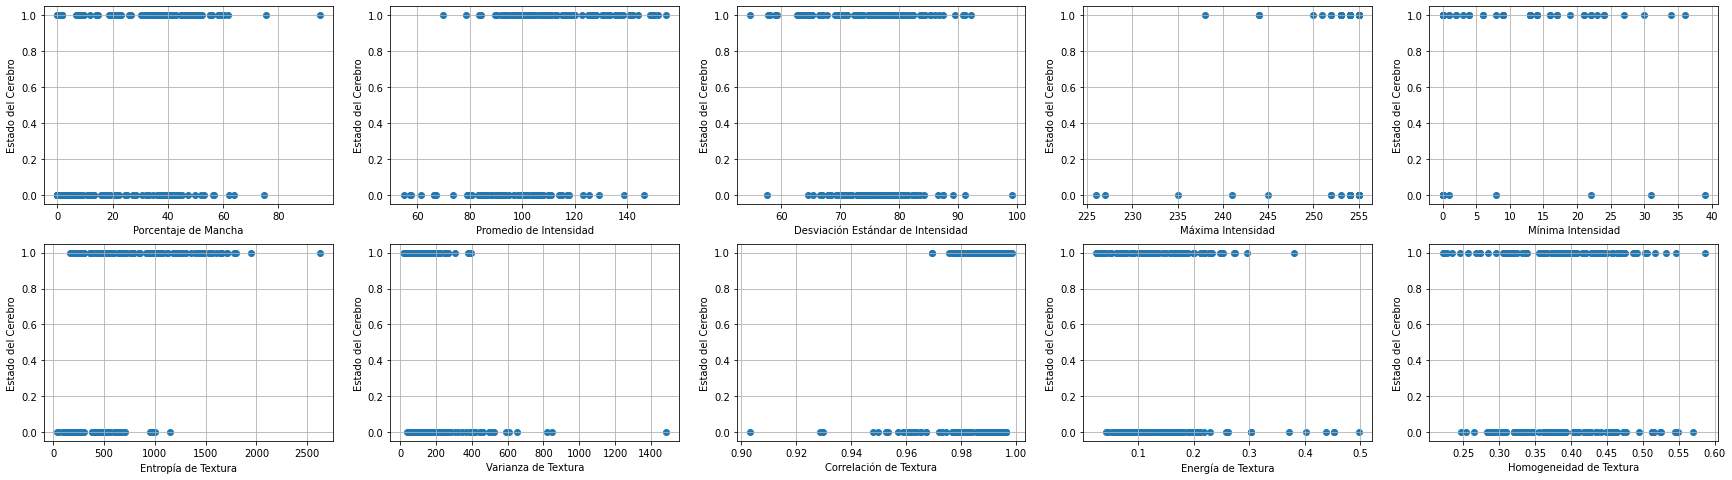

In [ ]:
plt.subplots(2,5, figsize = (30,8))
plt.subplot(251)
plt.scatter(data["Porcentaje de Mancha"], data["Estado del Cerebro"])
plt.xlabel("Porcentaje de Mancha")
plt.ylabel("Estado del Cerebro")
plt.grid()

plt.subplot(252)
plt.scatter(data["Promedio de Intensidad"], data["Estado del Cerebro"])
plt.xlabel("Promedio de Intensidad")
plt.ylabel("Estado del Cerebro")
plt.grid()

plt.subplot(253)
plt.scatter(data["Desviación Estándar de Intensidad"], data["Estado del Cerebro"])
plt.xlabel("Desviación Estándar de Intensidad")
plt.ylabel("Estado del Cerebro")
plt.grid()

plt.subplot(254)
plt.scatter(data["Máxima Intensidad"], data["Estado del Cerebro"])
plt.xlabel("Máxima Intensidad")
plt.ylabel("Estado del Cerebro")
plt.grid()

plt.subplot(255)
plt.scatter(data["Mínima Intensidad"], data["Estado del Cerebro"])
plt.xlabel("Mínima Intensidad")
plt.ylabel("Estado del Cerebro")
plt.grid()

plt.subplot(256)
plt.scatter(data["Entropía de Textura"], data["Estado del Cerebro"])
plt.xlabel("Entropía de Textura")
plt.ylabel("Estado del Cerebro")
plt.grid()

plt.subplot(257)
plt.scatter(data["Varianza de Textura"], data["Estado del Cerebro"])
plt.xlabel("Varianza de Textura")
plt.ylabel("Estado del Cerebro")
plt.grid()

plt.subplot(258)
plt.scatter(data["Correlación de Textura"], data["Estado del Cerebro"])
plt.xlabel("Correlación de Textura")
plt.ylabel("Estado del Cerebro")
plt.grid()

plt.subplot(259)
plt.scatter(data["Energía de Textura"], data["Estado del Cerebro"])
plt.xlabel("Energía de Textura")
plt.ylabel("Estado del Cerebro")
plt.grid()

plt.subplot(2,5,10)
plt.scatter(data["Homogeneidad de Textura"], data["Estado del Cerebro"])
plt.xlabel("Homogeneidad de Textura")
plt.ylabel("Estado del Cerebro")
plt.grid()

plt.show()

In [ ]:
# COMO LA VARIANZA Y LA CORRELACIÓN DE TEXTURAS ESTÁN ALTAMENTE CORRELACIONADAS, SOLO SE CONSIDERARÁ UNA, PUES SI NO ESTARÍAMOS REDUNDANDO DATOS
# ELEGIMOS LA CORRELACIÓN DE TEXTURA

# EL PORCENTAJE DE MANCHA, LA DESVIACIÓN ESTÁNDAR Y LA HOMOGENEIDAD DE LA TEXTURA Y ENERGÍA DE TEXTURA SON VARIABLES QUE TIENEN MUCHA INCERTIDUMBRE ENTRE SI HAY TUMOR O NO, POR TANTO NO LAS CONSIDERAMOS

# NOS QUEDAMOS CON LAS VARIABLES: 
  # Promedio de Intensidad
  # Máxima Intensidad
  # Mínima Intensidad
  # Entropía de Textura
  # Correlación de Textura

> # 1. ENTRENAMIENTO, VALIDACIÓN DE MODELO DE MACHINE LEARNING



> Separar Datos en Conjuntos de Entrenamiento y Validación
---

In [ ]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
caracteristicas = ["Promedio de Intensidad", "Máxima Intensidad", "Mínima Intensidad", "Entropía de Textura", "Correlación de Textura"]#["Promedio de Intensidad", "Entropía de Textura", "Correlación de Textura"]
objetivo = ["Estado del Cerebro"]

X = data[caracteristicas]
Y = data[objetivo]

In [ ]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.2, random_state = 0)

> Entrenamiento del Bosque Aleatorio y Validación de sus Parámetros
---

Las variable predictora es:  Promedio de Intensidad


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Para una cantidad de árboles de  10  la exactitud es:  0.815818487068487


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Para una cantidad de árboles de  20  la exactitud es:  0.8418062493062493


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  30  la exactitud es:  0.8321267621267621


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  40  la exactitud es:  0.8232708957708958


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  50  la exactitud es:  0.8222607947607947


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  60  la exactitud es:  0.8278163503163503


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  70  la exactitud es:  0.8268062493062492


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  80  la exactitud es:  0.8268062493062492


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  90  la exactitud es:  0.8222607947607947


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  100  la exactitud es:  0.8180941280941282


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  110  la exactitud es:  0.8135486735486734


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  120  la exactitud es:  0.8177153402153403


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  130  la exactitud es:  0.8177153402153403


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  140  la exactitud es:  0.8177153402153403


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  150  la exactitud es:  0.8177153402153403


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  160  la exactitud es:  0.8177153402153403


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  170  la exactitud es:  0.8185486735486736


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  180  la exactitud es:  0.8227153402153402


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  190  la exactitud es:  0.8227153402153402


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  200  la exactitud es:  0.8222607947607947


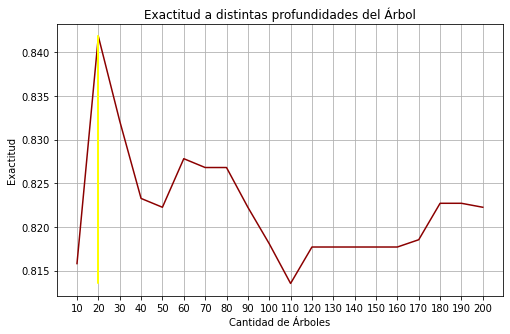

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES DE ÁRBOLES

print("Las variable predictora es: ", caracteristicas[0])

# PRUEBA DE LA CANTIDAD DE ÁRBOLES
estimadoresMinimo = 10
estimadoresMaximo = 200+1
estimadoresPaso = 10

errorCuadraticoMedioList = []
estimadores = np.array(range(estimadoresMinimo,estimadoresMaximo,estimadoresPaso))

for estimador in range(estimadoresMinimo,estimadoresMaximo,estimadoresPaso):
  forest = RandomForestClassifier(criterion = "gini", n_jobs = 3, oob_score = True, n_estimators = estimador, random_state = 0)  #CREAR EL MODELO DE BOSQUE ALEATORIO OPTIMIZANDO LOS NODOS POR REDUCCIÓN DE VARIANZA
  forest.fit(X_train, Y_train)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 20 EN 20, PUES TENEMOS 200 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(forest, X, Y, scoring = "balanced_accuracy", cv = cv, n_jobs = 3)
  errorCuadraticoMedioList.append(np.mean(scores))
  print("Para una cantidad de árboles de ", estimador, " la exactitud es: ", np.mean(scores))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(estimadores, errorCuadraticoMedio, c = "darkred")
plt.plot(20*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Exactitud a distintas profundidades del Árbol")
plt.xlabel("Cantidad de Árboles")
plt.ylabel("Exactitud")
plt.xticks(estimadores)
plt.grid()
plt.show()

In [ ]:
# EL BOSQUE CON CON UN BUEN SCORE ES DE 110 ÁRBOLES
forest = RandomForestClassifier(n_jobs = 2, oob_score = True, n_estimators = 20, random_state = 0)  #CREAR EL MODELO DE BOSQUE ALEATORIO OPTIMIZANDO LOS NODOS POR REDUCCIÓN DE VARIANZA
forest.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
                       oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

> Validación del Modelo de Bosque Aleatorio
---

In [ ]:
#Y_predtotal = forest.predict(X)
#GRÁFICA DEL MODELO
#plt.figure(figsize = (8,5))
#plt.plot(X, Y_predtotal, c = "purple")
#plt.title("Modelo Entrenado")
#plt.xlabel("Inercia Total")
#plt.ylabel("Ganancia de Velocidad")
#plt.grid()
#plt.show()

In [ ]:
forest.predict(X_test)

array([1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1.])

In [ ]:
# EXACTITUD
Y_pred = forest.predict(X_test)
ACC = balanced_accuracy_score(Y_test,Y_pred)*100

# OOB SCORE
OOBS = forest.oob_score_
OOBS = OOBS*100

print("La exactitud es: ", ACC, "%")
print("El oob score es: ", OOBS, "%")

La exactitud es:  85.85858585858585 %
El oob score es:  83.125 %


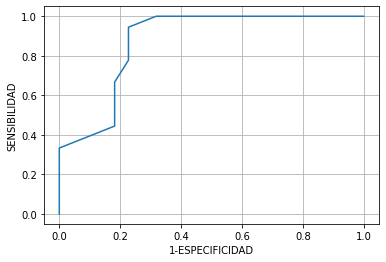

In [ ]:
Y_pred_prob = forest.predict_proba(X_test)
probs = Y_pred_prob[:,1]
dataValidacion = pd.DataFrame({"Prob de 1": probs})

umbrales = np.linspace(0.04,0.95,500)
sensibilidad = [1]
especificidad_1 = [1]

for umbral in umbrales:
  dataValidacion["Y pred"] = np.where(dataValidacion["Prob de 1"] > umbral, 1, 0)
  dataValidacion["Y real"] = Y_test["Estado del Cerebro"].values.tolist()
  
  confMatrix = pd.crosstab(dataValidacion["Y pred"], dataValidacion["Y real"])
  VP = confMatrix[1][1]
  VN = confMatrix[0][0]
  FP = confMatrix[0][1]
  FN = confMatrix[1][0]

  sensibilidad.append(VP/(VP+FN))
  especificidad_1.append(1-VN/(VN+FP))

sensibilidad.append(0)
especificidad_1.append(0)

plt.plot(especificidad_1,sensibilidad)
plt.xlabel("1-ESPECIFICIDAD")
plt.ylabel("SENSIBILIDAD")
plt.grid()
plt.show()

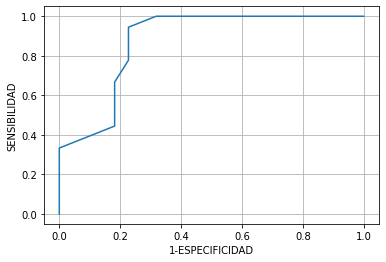

In [ ]:
espec_1, sens, umbrales = roc_curve(Y_test,probs)
plt.plot(espec_1,sens)
plt.xlabel("1-ESPECIFICIDAD")
plt.ylabel("SENSIBILIDAD")
plt.grid()
plt.show()

In [ ]:
umbrales

array([2.  , 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.55, 0.3 , 0.25, 0.2 ,
       0.15, 0.05, 0.  ])

In [ ]:
Y_pred_prob = forest.predict_proba(X_test)
probs = Y_pred_prob[:,1]
dataValidacion = pd.DataFrame({"Prob de 1": probs})

dataValidacion["Y pred"] = np.where(dataValidacion["Prob de 1"] > 0.3, 1, 0)
dataValidacion["Y real"] = Y_test["Estado del Cerebro"].values.tolist()
  
confMatrix = pd.crosstab(dataValidacion["Y pred"], dataValidacion["Y real"])
VP = confMatrix[1][1]
VN = confMatrix[0][0]
FP = confMatrix[0][1]
FN = confMatrix[1][0]

sensibilidad = (VP/(VP+FN))
especificidad_1 = (1-VN/(VN+FP))

print(sensibilidad,especificidad_1)

0.9444444444444444 0.2272727272727273


In [ ]:
# EXACTITUD
ACC = balanced_accuracy_score(dataValidacion["Y real"],dataValidacion["Y pred"])*100

# OOB SCORE
OOBS = forest.oob_score_
OOBS = OOBS*100

print("La exactitud es: ", ACC, "%")
print("El oob score es: ", OOBS, "%")

La exactitud es:  85.85858585858585 %
El oob score es:  83.125 %


> # 2. ENTRENAMIENTO, VALIDACIÓN DE MODELO DE MACHINE LEARNING SIN MÁXIMO Y MÍNIMO

In [ ]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
caracteristicas = ["Promedio de Intensidad", "Entropía de Textura", "Correlación de Textura"]
objetivo = ["Estado del Cerebro"]

X = data[caracteristicas]
Y = data[objetivo]

In [ ]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.2, random_state = 0)

Las variable predictora es:  Promedio de Intensidad


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Para una cantidad de árboles de  10  la exactitud es:  0.8305737318237318


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Para una cantidad de árboles de  20  la exactitud es:  0.8462302974802975


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  30  la exactitud es:  0.8424802974802976


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  40  la exactitud es:  0.8323035298035297


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  50  la exactitud es:  0.8323035298035297


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  60  la exactitud es:  0.8260535298035296


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  70  la exactitud es:  0.8310535298035298


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  80  la exactitud es:  0.8159525197025197


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  90  la exactitud es:  0.8270636308136309


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  100  la exactitud es:  0.8215080752580753


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  110  la exactitud es:  0.8265080752580752


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  120  la exactitud es:  0.8215080752580753


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  130  la exactitud es:  0.8270636308136309


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  140  la exactitud es:  0.8158136308136308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  150  la exactitud es:  0.8158136308136308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  160  la exactitud es:  0.8109525197025196


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  170  la exactitud es:  0.8159525197025197


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  180  la exactitud es:  0.8165080752580753


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  190  la exactitud es:  0.8159525197025197


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  200  la exactitud es:  0.8159525197025197


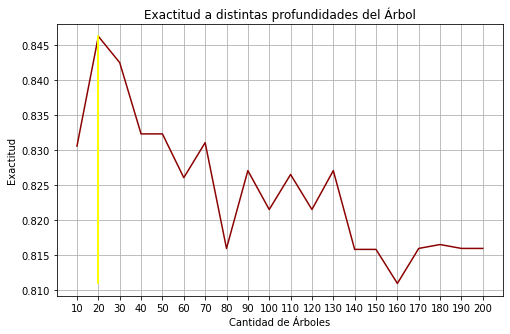

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES DE ÁRBOLES

print("Las variable predictora es: ", caracteristicas[0])

# PRUEBA DE LA CANTIDAD DE ÁRBOLES
estimadoresMinimo = 10
estimadoresMaximo = 200+1
estimadoresPaso = 10

errorCuadraticoMedioList = []
estimadores = np.array(range(estimadoresMinimo,estimadoresMaximo,estimadoresPaso))

for estimador in range(estimadoresMinimo,estimadoresMaximo,estimadoresPaso):
  forest = RandomForestClassifier(criterion = "gini", n_jobs = 3, oob_score = True, n_estimators = estimador, random_state = 0)  #CREAR EL MODELO DE BOSQUE ALEATORIO OPTIMIZANDO LOS NODOS POR REDUCCIÓN DE VARIANZA
  forest.fit(X_train, Y_train)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 20 EN 20, PUES TENEMOS 200 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(forest, X, Y, scoring = "balanced_accuracy", cv = cv, n_jobs = 3)
  errorCuadraticoMedioList.append(np.mean(scores))
  print("Para una cantidad de árboles de ", estimador, " la exactitud es: ", np.mean(scores))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(estimadores, errorCuadraticoMedio, c = "darkred")
plt.plot(20*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Exactitud a distintas profundidades del Árbol")
plt.xlabel("Cantidad de Árboles")
plt.ylabel("Exactitud")
plt.xticks(estimadores)
plt.grid()
plt.show()

In [ ]:
# EL BOSQUE CON CON UN BUEN SCORE ES DE 20 ÁRBOLES
forest = RandomForestClassifier(n_jobs = 2, oob_score = True, n_estimators = 20, random_state = 0)  #CREAR EL MODELO DE BOSQUE ALEATORIO OPTIMIZANDO LOS NODOS POR REDUCCIÓN DE VARIANZA
forest.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
                       oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

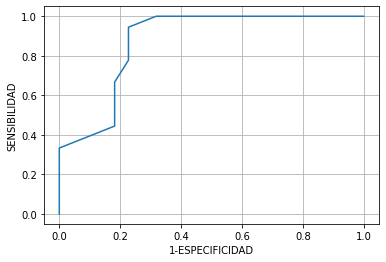

In [ ]:
espec_1, sens, umbrales = roc_curve(Y_test,probs)
plt.plot(espec_1,sens)
plt.xlabel("1-ESPECIFICIDAD")
plt.ylabel("SENSIBILIDAD")
plt.grid()
plt.show()

In [ ]:
umbrales

array([2.  , 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.55, 0.3 , 0.25, 0.2 ,
       0.15, 0.05, 0.  ])

In [ ]:
Y_pred_prob = forest.predict_proba(X_test)
probs = Y_pred_prob[:,1]
dataValidacion = pd.DataFrame({"Prob de 1": probs})

dataValidacion["Y pred"] = np.where(dataValidacion["Prob de 1"] > 0.55, 1, 0)
dataValidacion["Y real"] = Y_test["Estado del Cerebro"].values.tolist()
  
confMatrix = pd.crosstab(dataValidacion["Y pred"], dataValidacion["Y real"])
VP = confMatrix[1][1]
VN = confMatrix[0][0]
FP = confMatrix[0][1]
FN = confMatrix[1][0]

sensibilidad = (VP/(VP+FN))
especificidad_1 = (1-VN/(VN+FP))

print(sensibilidad,especificidad_1)

0.8888888888888888 0.2272727272727273


In [ ]:
# EXACTITUD
ACC = balanced_accuracy_score(dataValidacion["Y real"],dataValidacion["Y pred"])*100

# OOB SCORE
OOBS = forest.oob_score_
OOBS = OOBS*100

print("La exactitud es: ", ACC, "%")
print("El oob score es: ", OOBS, "%")

La exactitud es:  83.08080808080808 %
El oob score es:  78.75 %


> # 3. ENTRENAMIENTO, VALIDACIÓN DE MODELO DE MACHINE LEARNING MEDIANTE SELECCIÓN DE CARACTERÍSTICAS RFE


In [ ]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
nombreColumnas = data.columns.values.tolist()
objetivo = ["Estado del Cerebro"]
noelegir = ["Estado del Cerebro", "Varianza de Textura"]
caracteristicas = [x for x in nombreColumnas if x != noelegir[0] and x != noelegir[1]]

X = data[caracteristicas]
Y = data[objetivo]

In [ ]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.2, random_state = 0)

Las variable predictora es:  Porcentaje de Mancha


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Para una cantidad de árboles de  10  la exactitud es:  0.8352532190032189


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Para una cantidad de árboles de  20  la exactitud es:  0.8392382617382618


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  30  la exactitud es:  0.839099372849373


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  40  la exactitud es:  0.8490993728493729


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  50  la exactitud es:  0.8506320068820068


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  60  la exactitud es:  0.8607281607281607


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  70  la exactitud es:  0.8607281607281607


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  80  la exactitud es:  0.8493392718392718


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  90  la exactitud es:  0.8435438172938173


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  100  la exactitud es:  0.8543392718392718


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  110  la exactitud es:  0.8543392718392718


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  120  la exactitud es:  0.8497938172938173


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  130  la exactitud es:  0.8497938172938173


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  140  la exactitud es:  0.8543392718392718


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  150  la exactitud es:  0.8543392718392718


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  160  la exactitud es:  0.8497938172938173


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  170  la exactitud es:  0.8543392718392718


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  180  la exactitud es:  0.8497938172938173


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  190  la exactitud es:  0.8543392718392718


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  200  la exactitud es:  0.8497938172938173


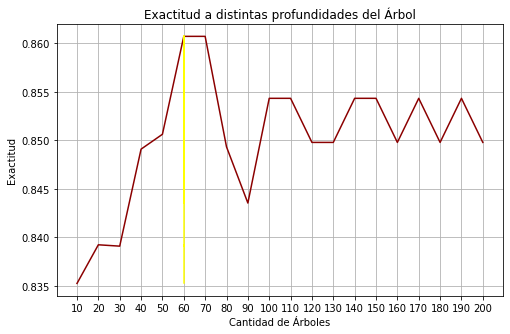

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES DE ÁRBOLES

print("Las variable predictora es: ", caracteristicas[0])

# PRUEBA DE LA CANTIDAD DE ÁRBOLES
estimadoresMinimo = 10
estimadoresMaximo = 200+1
estimadoresPaso = 10

errorCuadraticoMedioList = []
estimadores = np.array(range(estimadoresMinimo,estimadoresMaximo,estimadoresPaso))

for estimador in range(estimadoresMinimo,estimadoresMaximo,estimadoresPaso):
  forest = RandomForestClassifier(criterion = "gini", n_jobs = 3, oob_score = True, n_estimators = estimador, random_state = 0)  #CREAR EL MODELO DE BOSQUE ALEATORIO OPTIMIZANDO LOS NODOS POR REDUCCIÓN DE VARIANZA
  forest.fit(X_train, Y_train)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 20 EN 20, PUES TENEMOS 200 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(forest, X, Y, scoring = "balanced_accuracy", cv = cv, n_jobs = 3)
  errorCuadraticoMedioList.append(np.mean(scores))
  print("Para una cantidad de árboles de ", estimador, " la exactitud es: ", np.mean(scores))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(estimadores, errorCuadraticoMedio, c = "darkred")
plt.plot(60*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Exactitud a distintas profundidades del Árbol")
plt.xlabel("Cantidad de Árboles")
plt.ylabel("Exactitud")
plt.xticks(estimadores)
plt.grid()
plt.show()

In [ ]:
# EL BOSQUE CON CON UN BUEN SCORE ES DE 60 ÁRBOLES
forest = RandomForestClassifier(n_jobs = 2, oob_score = True, n_estimators = 60, random_state = 0)  #CREAR EL MODELO DE BOSQUE ALEATORIO OPTIMIZANDO LOS NODOS POR REDUCCIÓN DE VARIANZA
forest.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=2,
                       oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

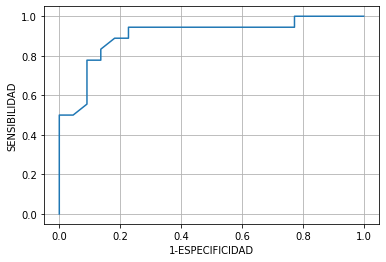

In [ ]:
espec_1, sens, umbrales = roc_curve(Y_test,probs)
plt.plot(espec_1,sens)
plt.xlabel("1-ESPECIFICIDAD")
plt.ylabel("SENSIBILIDAD")
plt.grid()
plt.show()

In [ ]:
umbrales

array([2.        , 1.        , 0.95714286, 0.94285714, 0.87857143,
       0.85714286, 0.85      , 0.78571429, 0.74285714, 0.71428571,
       0.7       , 0.66428571, 0.55      , 0.17142857, 0.11428571,
       0.09285714, 0.07857143, 0.05      ])

In [ ]:
Y_pred_prob = forest.predict_proba(X_test)
probs = Y_pred_prob[:,1]
dataValidacion = pd.DataFrame({"Prob de 1": probs})

dataValidacion["Y pred"] = np.where(dataValidacion["Prob de 1"] > 0.6, 1, 0)
dataValidacion["Y real"] = Y_test["Estado del Cerebro"].values.tolist()
  
confMatrix = pd.crosstab(dataValidacion["Y pred"], dataValidacion["Y real"])
VP = confMatrix[1][1]
VN = confMatrix[0][0]
FP = confMatrix[0][1]
FN = confMatrix[1][0]

sensibilidad = (VP/(VP+FN))
especificidad_1 = (1-VN/(VN+FP))

print(sensibilidad,especificidad_1)

0.9444444444444444 0.13636363636363635


In [ ]:
# EXACTITUD
ACC = balanced_accuracy_score(dataValidacion["Y real"],dataValidacion["Y pred"])*100

# OOB SCORE
OOBS = forest.oob_score_
OOBS = OOBS*100

print("La exactitud es: ", ACC, "%")
print("El oob score es: ", OOBS, "%")

La exactitud es:  90.4040404040404 %
El oob score es:  84.375 %


In [ ]:
n_var = 1

rfe = RFE(forest,n_var)
rfe = rfe.fit(X_train,Y_train)
list(zip(caracteristicas,rfe.ranking_))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[('Porcentaje de Mancha', 5),
 ('Promedio de Intensidad', 2),
 ('Desviación Estándar de Intensidad', 7),
 ('Máxima Intensidad', 9),
 ('Mínima Intensidad', 8),
 ('Entropía de Textura', 1),
 ('Correlación de Textura', 3),
 ('Energía de Textura', 4),
 ('Homogeneidad de Textura', 6)]

In [ ]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
nombreColumnas = data.columns.values.tolist()
objetivo = ["Estado del Cerebro"]
noelegir = ["Estado del Cerebro", "Varianza de Textura", "Máxima Intensidad", "Mínima Intensidad"]
caracteristicas = [x for x in nombreColumnas if x not in noelegir]

X = data[caracteristicas]
Y = data[objetivo]

In [ ]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.2, random_state = 0)

Las variable predictora es:  Porcentaje de Mancha


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Para una cantidad de árboles de  10  la exactitud es:  0.8388607226107225


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Para una cantidad de árboles de  20  la exactitud es:  0.826684842934843


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  30  la exactitud es:  0.8305309967809968


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  40  la exactitud es:  0.8367809967809968


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  50  la exactitud es:  0.8270587745587745


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  60  la exactitud es:  0.8367809967809968


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  70  la exactitud es:  0.8367809967809968


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  80  la exactitud es:  0.8346976634476635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  90  la exactitud es:  0.840253219003219


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  100  la exactitud es:  0.8346976634476635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  110  la exactitud es:  0.8346976634476635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  120  la exactitud es:  0.8346976634476635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  130  la exactitud es:  0.8346976634476635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  140  la exactitud es:  0.8409476634476635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  150  la exactitud es:  0.8409476634476635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  160  la exactitud es:  0.8346976634476635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  170  la exactitud es:  0.8409476634476635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  180  la exactitud es:  0.8409476634476635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  190  la exactitud es:  0.8409476634476635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  200  la exactitud es:  0.8409476634476635


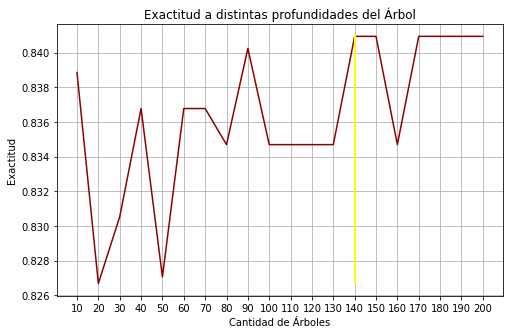

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES DE ÁRBOLES

print("Las variable predictora es: ", caracteristicas[0])

# PRUEBA DE LA CANTIDAD DE ÁRBOLES
estimadoresMinimo = 10
estimadoresMaximo = 200+1
estimadoresPaso = 10

errorCuadraticoMedioList = []
estimadores = np.array(range(estimadoresMinimo,estimadoresMaximo,estimadoresPaso))

for estimador in range(estimadoresMinimo,estimadoresMaximo,estimadoresPaso):
  forest = RandomForestClassifier(criterion = "gini", n_jobs = 3, oob_score = True, n_estimators = estimador, random_state = 0)  #CREAR EL MODELO DE BOSQUE ALEATORIO OPTIMIZANDO LOS NODOS POR REDUCCIÓN DE VARIANZA
  forest.fit(X_train, Y_train)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 20 EN 20, PUES TENEMOS 200 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(forest, X, Y, scoring = "balanced_accuracy", cv = cv, n_jobs = 3)
  errorCuadraticoMedioList.append(np.mean(scores))
  print("Para una cantidad de árboles de ", estimador, " la exactitud es: ", np.mean(scores))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(estimadores, errorCuadraticoMedio, c = "darkred")
plt.plot(140*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Exactitud a distintas profundidades del Árbol")
plt.xlabel("Cantidad de Árboles")
plt.ylabel("Exactitud")
plt.xticks(estimadores)
plt.grid()
plt.show()

In [ ]:
# EL BOSQUE CON CON UN BUEN SCORE ES DE 110 ÁRBOLES
forest = RandomForestClassifier(n_jobs = 2, oob_score = True, n_estimators = 140, random_state = 0)  #CREAR EL MODELO DE BOSQUE ALEATORIO OPTIMIZANDO LOS NODOS POR REDUCCIÓN DE VARIANZA
forest.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=2,
                       oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

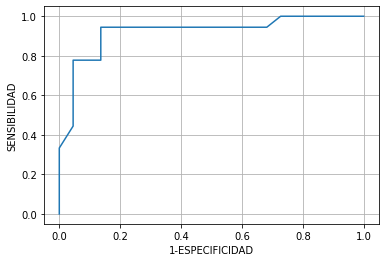

In [ ]:
espec_1, sens, umbrales = roc_curve(Y_test,probs)
plt.plot(espec_1,sens)
plt.xlabel("1-ESPECIFICIDAD")
plt.ylabel("SENSIBILIDAD")
plt.grid()
plt.show()

In [ ]:
umbrales

array([2.        , 1.        , 0.98333333, 0.96666667, 0.93333333,
       0.9       , 0.88333333, 0.81666667, 0.75      , 0.68333333,
       0.43333333, 0.33333333, 0.21666667, 0.18333333, 0.16666667,
       0.13333333, 0.06666667, 0.03333333])

In [ ]:
Y_pred_prob = forest.predict_proba(X_test)
probs = Y_pred_prob[:,1]
dataValidacion = pd.DataFrame({"Prob de 1": probs})

dataValidacion["Y pred"] = np.where(dataValidacion["Prob de 1"] > 0.68333333, 1, 0)
dataValidacion["Y real"] = Y_test["Estado del Cerebro"].values.tolist()
  
confMatrix = pd.crosstab(dataValidacion["Y pred"], dataValidacion["Y real"])
VP = confMatrix[1][1]
VN = confMatrix[0][0]
FP = confMatrix[0][1]
FN = confMatrix[1][0]

sensibilidad = (VP/(VP+FN))
especificidad_1 = (1-VN/(VN+FP))

print(sensibilidad,especificidad_1)

0.8888888888888888 0.18181818181818177


In [ ]:
# EXACTITUD
ACC = balanced_accuracy_score(dataValidacion["Y real"],dataValidacion["Y pred"])*100

# OOB SCORE
OOBS = forest.oob_score_
OOBS = OOBS*100

print("La exactitud es: ", ACC, "%")
print("El oob score es: ", OOBS, "%")

La exactitud es:  85.35353535353536 %
El oob score es:  85.625 %


> Exportar Modelo de Bosque Aleatorio
---

In [ ]:
filenameModelo = "TUMOR_CEREBRO/Detector_Tumores.pkl"
fullpathModelo = os.path.join(mainpath,filenameModelo)

joblib.dump(forest,fullpathModelo)

['drive/My Drive/DATASET/TUMOR_CEREBRO/Detector_Tumores.pkl']